You will now have the possibility to practice all we have seen in this chapter, on a new dataset.

The dataset is called "Wine quality" and has been found and downloaded here: http://archive.ics.uci.edu/ml/datasets/Wine+Quality.

It contains the characteristics of 6497 wines, and their ``quality``, a grade between 0 and 10 given by 3 wine experts. On the website, the data is separated between white and red wine, but we have grouped them together for the purpose of the exercise. We added an additional attribute ``type``, containing the type of wine (red or white).

For the purpose of the exercise, and to train with missing values, some values have been deleted or modified from the original dataset.

In [2]:
# Import the functions for machine learning

%run 1-functions.ipynb

### 1. Import the dataset

+ Import the dataset called ``wine.csv`` into the variable ``data`` __(2 points)__.

In [3]:
# import dataset

import pandas as pd

# Begin answer
data = pd.read_csv('wine.csv')
# End answer

In [32]:
### BEGIN HIDDEN TESTS
assert not data.empty
### END HIDDEN TESTS

In [33]:
### BEGIN HIDDEN TESTS
assert not data['fixed acidity'].empty
### END HIDDEN TESTS

### 2. Get to know the dataset

Understand the dataset: how it looks like, the different attributes, their distribution. Plot the distribution of the attributes.

+ Place the head of the dataset in the variable ``head`` __(1 point)__.
+ Place the description of the numerical attributes in the variable ``description`` __(1 point)__.
+ How many unique values does the attribute ``type`` contain? Place this number in the variable ``unique_type`` __(1 point)__.

In [34]:
# examine dataset

# Begin answer
head = data.head()
description = data.describe()
unique_type = len(data['type'].unique())
# End answer

In [35]:
### BEGIN HIDDEN TESTS
assert head.equals(data.head())
### END HIDDEN TESTS

In [36]:
### BEGIN HIDDEN TESTS
assert description.equals(data.describe())
### END HIDDEN TESTS

In [37]:
### BEGIN HIDDEN TESTS
assert unique_type == len(data['type'].unique())
### END HIDDEN TESTS

### 3. Detect the missing values

+ There is only one attribute which contains missing values. Place the number of missing values for this attribute in the variable ``missing_nb`` __(1 point)__.

Think about how to deal with the missing values.

In [40]:
# detect missing values

# Begin answer
missing_nb = data['density'].isna().sum()
# End answer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 5235 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [39]:
### BEGIN HIDDEN TESTS
assert missing_nb == data['density'].isna().sum()
### END HIDDEN TESTS

+ The attribute containing the missing values can be recovered with a reasonable accuracy using the attributes ``residual sugar`` and ``alcohol``. Use this formula to recover the attribute: ``attribute = -0.0014 * alcohol + 0.0002 * residual sugar + 1.0082`` __(2 points)__.

In [4]:
# recover the missing values

# Begin answer
data.loc[data['density'].isna(), 'density'] = -0.0014 * data['alcohol'] + 0.0002 * data['residual sugar'] + 1.0082
# End answer

In [53]:
### BEGIN HIDDEN TESTS
assert data.loc[data['density'].isna()].empty
assert data.iloc[6]['density'] == -0.0014 * data.iloc[6]['alcohol'] + 0.0002 * data.iloc[6]['residual sugar'] + 1.0082
### END HIDDEN TESTS

### 4. Build the regression model

+ Use the dataset with all the attributes to predict the attribute ``quality`` with a regression model (you can use the functions we used along the chapter).
+ Place the right attributes in the variables ``x`` and ``y`` __(2 points)__.
+ Place the MAE in the variable ``mae_regression`` __(1 point)__.

In [5]:
# predict 'quality' with regression

from sklearn.metrics import mean_absolute_error

# Begin answer
x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
              'density', 'pH', 'sulphates', 'alcohol']
y = ['quality']

predictions, ytest = knn_regression(data, x, y)
mae_regression = mean_absolute_error(predictions, ytest)
print('MAE: ' + str(mae_regression))
# End answer

MAE: 0.6105846153846155


In [6]:
### BEGIN HIDDEN TESTS
assert x == ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
              'density', 'pH', 'sulphates', 'alcohol']
### END HIDDEN TESTS

In [7]:
### BEGIN HIDDEN TESTS
assert y == ['quality']
### END HIDDEN TESTS

In [8]:
### BEGIN HIDDEN TESTS
assert mae_regression > 0.6 and mae_regression < 0.7
### END HIDDEN TESTS

### 5. Visualize the predictions

+ Plot the graph predictions vs. true labels.

Text(0.5, 1.0, 'Prediction vs. true label')

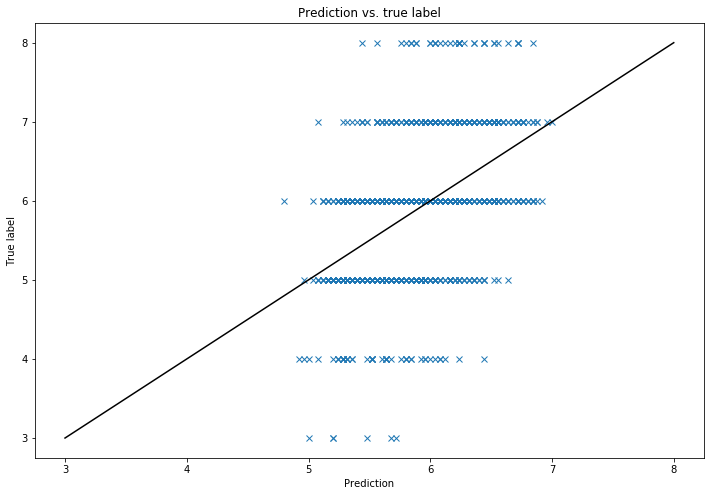

In [11]:
# plot predictions vs. true labels

import matplotlib.pyplot as plt
import numpy as np

# Begin answer
plt.figure(figsize = (12, 8))

pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x')

x = np.linspace(3, 8, 10)
plt.plot(x, x, color = 'black')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label')
# End answer

### 6. Attributes selection

+ Build other models with different attributes.
+ Place the combination of attributes which gives the worst performance in the variable ``worst_comb``, it contains only one attribute __(1 point)__.
+ Place the combination of attributes which gives the best performance in the variable ``best_comb``, it contains 5 attributes (including ``fixed acidity`` and ``volatile acidity``) __(1 point)__.

In [12]:
# find best and worst attribute combinations

# Begin answer
worst_comb = ['sulphates']
best_comb = ['fixed acidity', 'volatile acidity', 'pH', 'sulphates', 'alcohol']
# End answer

In [13]:
### BEGIN HIDDEN TESTS
assert worst_comb == ['sulphates']
### END HIDDEN TESTS

In [14]:
### BEGIN HIDDEN TESTS
assert best_comb == ['fixed acidity', 'volatile acidity', 'pH', 'sulphates', 'alcohol']
### END HIDDEN TESTS

### 7. Classification model

+ Predict the attribute ``quality`` with a classification model, with all the attributes.
+ Place the MAE in the variable ``mae_classification`` __(1 point)__.
+ Plot the results.

Think about which model is the best to use: regression or classification? Why? Look at the values of the variable ``quality``.

In [15]:
# predict 'quality' with classification

from sklearn.metrics import mean_absolute_error

# Begin answer
x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
              'density', 'pH', 'sulphates', 'alcohol']
y = ['quality']

predictions, ytest = knn_classification(data, x, y)
mae_classification = mean_absolute_error(predictions, ytest)
print('MAE: ' + str(mae_classification))
# End answer

MAE: 0.5884615384615385


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [16]:
### BEGIN HIDDEN TESTS
assert mae_classification > 0.5 and mae_classification < 0.6
### END HIDDEN TESTS

### 8. Split the dataset

+ Split the dataset on a well chosen attribute, and predict the attribute ``quality`` with the new datasets and the chosen type of task (classification or regression).
+ Place the two MAEs in the variables ``mae_1`` and ``mae_2`` __(2 points)__.

In [17]:
# split the dataset and make predictions

from sklearn.metrics import mean_absolute_error

# Begin answer
x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
              'density', 'pH', 'sulphates', 'alcohol']
y = ['quality']

white_wine = data.loc[data['type'] == 'white']
predictions, ytest = knn_classification(white_wine, x, y)
mae_1 = mean_absolute_error(predictions, ytest)
print('MAE 1: ' + str(mae_1))

red_wine = data.loc[data['type'] == 'red']
predictions, ytest = knn_classification(red_wine, x, y)
mae_2 = mean_absolute_error(predictions, ytest)
print('MAE 2: ' + str(mae_2))
# End answer

MAE 1: 0.6642857142857143
MAE 2: 0.49375


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [18]:
### BEGIN HIDDEN TESTS
assert (mae_1 > 0.6 and mae_1 < 0.7) or (mae_2 > 0.6 and mae_2 < 0.7)
### END HIDDEN TESTS

In [19]:
### BEGIN HIDDEN TESTS
assert (mae_1 > 0.4 and mae_1 < 0.5) or (mae_2 > 0.4 and mae_2 < 0.5)
### END HIDDEN TESTS